## Data Cleaning on Time Series

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Data_Fajar/Data_Science_Projects/perrin-freres-monthly-champagne-.csv')
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [3]:
#change the columns name
df.columns=['Month', 'Sales']
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [5]:
df.isnull().sum()

Month    1
Sales    2
dtype: int64

In [6]:
df.tail()

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [7]:
df.drop(106, axis = 0, inplace=True)

In [8]:
df.drop(105, axis = 0, inplace=True)

In [10]:
df.dtypes

Month     object
Sales    float64
dtype: object

In [11]:
#convert month columns to date format
df['Month'] = pd.to_datetime(df['Month'])

In [13]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [14]:
df.set_index('Month', inplace=True)
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [16]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


## Checking Stationary Trend in Data

### 1. visualize sales  

<AxesSubplot:xlabel='Month'>

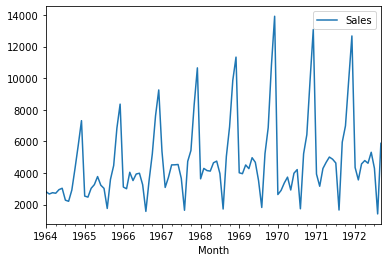

In [17]:
df.plot()
# there is seassonality in data
# month of christmas sales goes up each year and after it sales goes down

In [18]:
# statistical test to check seasonality 
# if p-value < 0.05 the data is stationary

from statsmodels.tsa.stattools import adfuller

In [19]:
adfuller(df['Sales'])

# H0 -- data is not stationary
# H1 -- data is stationary

(-1.8335930563276248,
 0.363915771660244,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [22]:
def adfuller_test(sales):
    result = adfuller(sales)
    
    labels = ['ADF test statistics', 'p-value', 'lags used', 'observations']
    
    for value, label in zip(result, labels):
        print('{} : {}'.format(labels, value))
    if result[1] <= 0.05:
        print('Strong evidence against H0 & data is stationary')
    else:
        print('Weak evidence against H0 & data is not stationary')

In [23]:
adfuller_test(df['Sales'])

['ADF test statistics', 'p-value', 'lags used', 'observations'] : -1.8335930563276248
['ADF test statistics', 'p-value', 'lags used', 'observations'] : 0.363915771660244
['ADF test statistics', 'p-value', 'lags used', 'observations'] : 11
['ADF test statistics', 'p-value', 'lags used', 'observations'] : 93
Weak evidence against H0 & data is not stationary


In [24]:
## The goal is to make data stationary for time series use case

## Making data stationary

In [25]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [26]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [28]:
df['Sales First Diff'] = df['Sales'] - df['Sales'].shift(1)

In [29]:
df['Seasonal First Diff'] = df['Sales'] - df['Sales'].shift(12)

In [30]:
df.head()

,Sales,Sales First Diff,Seasonal First Diff
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN


In [32]:
adfuller_test(df['Seasonal First Diff'].dropna())

['ADF test statistics', 'p-value', 'lags used', 'observations'] : -7.626619157213163
['ADF test statistics', 'p-value', 'lags used', 'observations'] : 2.060579696813685e-11
['ADF test statistics', 'p-value', 'lags used', 'observations'] : 0
['ADF test statistics', 'p-value', 'lags used', 'observations'] : 92
Strong evidence against H0 & data is stationary


<AxesSubplot:xlabel='Month'>

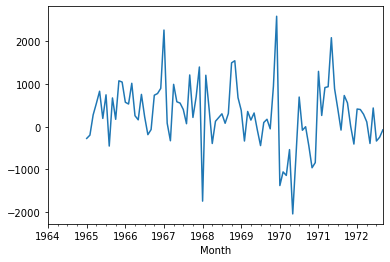

In [33]:
df['Seasonal First Diff'].plot()

## Applying ARIMA

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [35]:
df.head(15)

,Sales,Sales First Diff,Seasonal First Diff
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


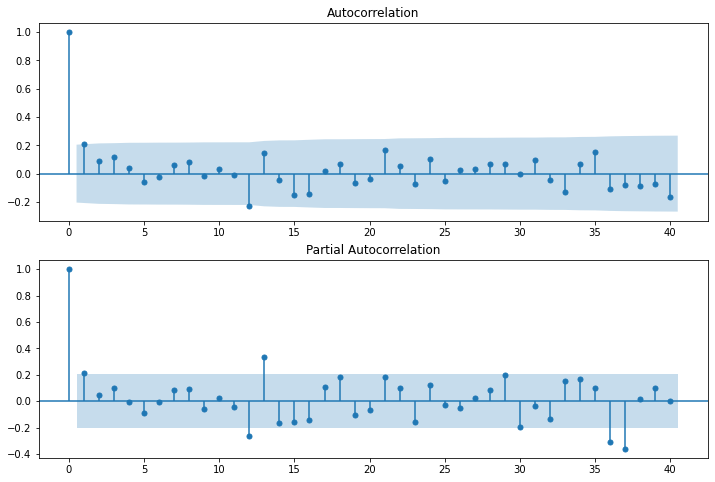

In [36]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal First Diff'].iloc[13:], lags=40, ax=ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal First Diff'].iloc[13:], lags=40, ax=ax2)

In [ ]:
#from the graph above we can say
# q = 1
# p = 1
# d = 1

In [37]:
from statsmodels.tsa.arima_model import ARIMA

In [38]:
model = ARIMA(df['Sales'], order=(1,1,1))

C:\Users\fajar\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\fajar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [39]:
model = model.fit()

In [40]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARIMA
====================================================================
Model:              ARIMA            BIC:                 1920.8287 
Dependent Variable: D.Sales          Log-Likelihood:      -951.13   
Date:               2021-12-17 07:10 Scale:               1.0000    
No. Observations:   104              Method:              css-mle   
Df Model:           3                Sample:              02-01-1964
Df Residuals:       101                                   09-01-1972
Converged:          1.0000           S.D. of innovations: 2227.262  
No. Iterations:     16.0000          HQIC:                1914.536  
AIC:                1910.2511                                       
---------------------------------------------------------------------
                 Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
---------------------------------------------------------------------
const           22.7844   12.4052    1.8367  0.0663  -1.5294  47.0982
ar.L1.D.Sales    0.4343    0.0893    4.8657  0.0000   0.2594   0.6093
ma.L1.D.Sales   -1.0000    0.0260  -38.5032  0.0000  -1.0509  -0.9491
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1            2.3023             0.0000           2.3023             0.0000
MA.1            1.0000             0.0000           1.0000             0.0000
====================================================================

"""

In [41]:
df.shape

(105, 3)

In [42]:
df['forecast'] = model.predict(start = 90, end = 103, dynamic = True)

In [45]:
df.tail(20)

,Sales,Sales First Diff,Seasonal First Diff,forecast
Month,,,,
1971-02-01,3162.0,-772.0,263.0,NaN
1971-03-01,4286.0,1124.0,916.0,NaN
1971-04-01,4676.0,390.0,936.0,NaN
1971-05-01,5010.0,334.0,2083.0,NaN
1971-06-01,4874.0,-136.0,888.0,NaN
1971-07-01,4633.0,-241.0,416.0,473.070429
1971-08-01,1659.0,-2974.0,-79.0,218.364224
1971-09-01,5951.0,4292.0,730.0,107.733665
1971-10-01,6981.0,1030.0,557.0,59.681751


<AxesSubplot:xlabel='Month'>

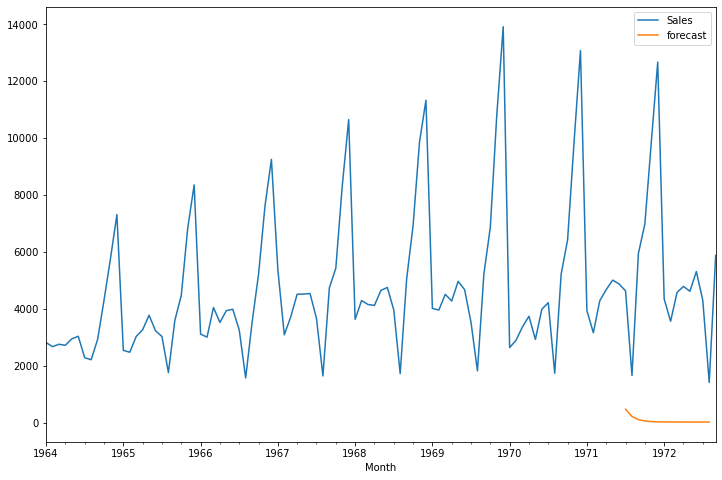

In [46]:
df[['Sales', 'forecast']].plot(figsize = (12,8))

In [ ]:
## because we had seasonal data -- ARIMA isnt suit for forecasting
## we use SARIMAX to better prediction

## Applying SARIMAX

In [47]:
import statsmodels.api as sm

In [ ]:
#for seasonal order we will pas(p,q,d,shift value)

In [48]:
model = sm.tsa.statespace.SARIMAX(df['Sales'], order=(1,1,1), seasonal_order=(1,1,1,12))

C:\Users\fajar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [49]:
result = model.fit()

In [50]:
df['forecast_SARIMAX'] = result.predict(start = 90, end =103, dynamic = True)

In [51]:
df.tail(20)

,Sales,Sales First Diff,Seasonal First Diff,forecast,forecast_SARIMAX
Month,,,,,
1971-02-01,3162.0,-772.0,263.0,NaN,NaN
1971-03-01,4286.0,1124.0,916.0,NaN,NaN
1971-04-01,4676.0,390.0,936.0,NaN,NaN
1971-05-01,5010.0,334.0,2083.0,NaN,NaN
1971-06-01,4874.0,-136.0,888.0,NaN,NaN
1971-07-01,4633.0,-241.0,416.0,473.070429,4437.324120
1971-08-01,1659.0,-2974.0,-79.0,218.364224,2050.747432
1971-09-01,5951.0,4292.0,730.0,107.733665,5493.376368
1971-10-01,6981.0,1030.0,557.0,59.681751,6752.039133


<AxesSubplot:xlabel='Month'>

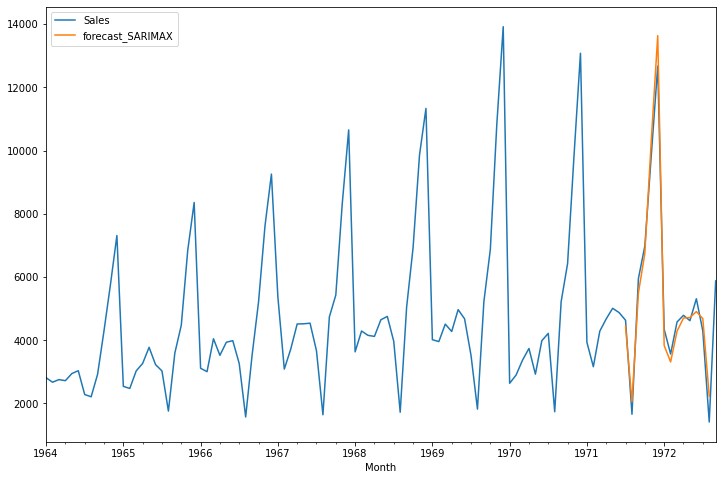

In [52]:
df[['Sales', 'forecast_SARIMAX']].plot(figsize = (12,8))

## Predict on future data

In [53]:
from pandas.tseries.offsets import DateOffset
# add for 24 months

In [57]:
df.index[-1]

Timestamp('1972-09-01 00:00:00')

In [58]:
future_dates = [df.index[-1] + DateOffset(months = x)for x in range(0,24)]

In [59]:
future_dates[1:]

[Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00')]

In [60]:
future_dataset = pd.DataFrame(index=future_dates[1:], columns=df.columns)

In [61]:
future_dataset.tail()

,Sales,Sales First Diff,Seasonal First Diff,forecast,forecast_SARIMAX
1974-04-01,NaN,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN,NaN


In [62]:
future_df = pd.concat([df, future_dataset])

In [63]:
future_df.shape

(128, 5)

In [66]:
future_df['forecast_SARIMAX_2'] = result.predict(start = 104, end = 124, dynamic = True)

<AxesSubplot:>

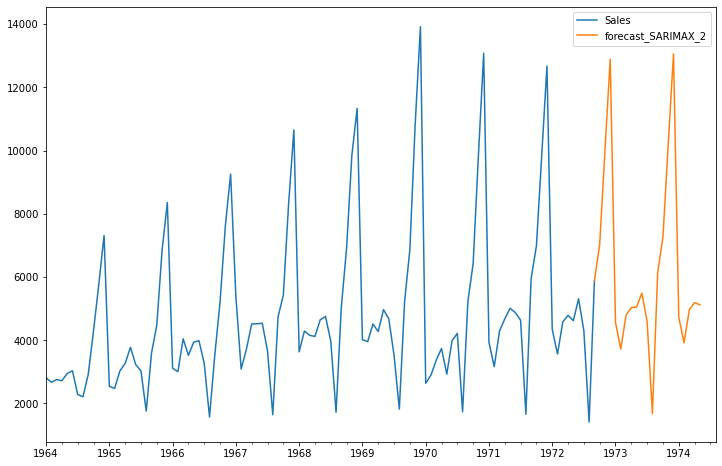

In [67]:
future_df[['Sales', 'forecast_SARIMAX_2']].plot(figsize=(12,8))